In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 


In [46]:
df = pd.DataFrame(columns = ['retire_67', 'retire_68', 'retire_69', 'retire_70'], index= pd.date_range("2021-03-01", periods=420, freq="M"))

lois_df = pd.DataFrame(columns = ['lois_retire_66', 'lois_retire_67', 'lois_retire_68', 'lois_retire_69', 'lois_retire_70'], index = pd.date_range('2021-03-01', periods = 420, freq = 'M'))

In [48]:
lois_df

,lois_retire_66,lois_retire_67,lois_retire_68,lois_retire_69,lois_retire_70
2021-03-31,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2055-10-31,NaN,NaN,NaN,NaN,NaN
2055-11-30,NaN,NaN,NaN,NaN,NaN
2055-12-31,NaN,NaN,NaN,NaN,NaN
2056-01-31,NaN,NaN,NaN,NaN,NaN


In [45]:
def calculate_retirement(dataframe, start_date, monthly_payment):
    counter = 0
    new_col = []
    for i in dataframe.iloc[[np.where(dataframe.index > start_date)][0][0]].index:
        counter += monthly_payment
        new_col.append(counter)
    return new_col

In [56]:
df['retire_67'] = calculate_retirement(df, '2021-02-28', 3175)  
df['retire_68']['2021-05-01':] = calculate_retirement(df, '2021-05-01', 3435)
df['retire_69']['2022-05-01':] = calculate_retirement(df, '2022-05-01', 3695)
df['retire_70']['2023-05-01':] = calculate_retirement(df, '2023-05-01', 3954)

In [57]:
df

,retire_67,retire_68,retire_69,retire_70
2021-03-31,3175,NaN,NaN,NaN
2021-04-30,6350,NaN,NaN,NaN
2021-05-31,9525,3435,NaN,NaN
2021-06-30,12700,6870,NaN,NaN
2021-07-31,15875,10305,NaN,NaN
...,...,...,...,...
2055-10-31,1320800,1422090,1485390,1542060
2055-11-30,1323975,1425525,1489085,1546014
2055-12-31,1327150,1428960,1492780,1549968
2056-01-31,1330325,1432395,1496475,1553922


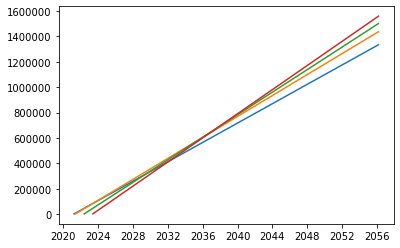

In [58]:
plt.plot(df)